In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scikit_posthocs import posthoc_dunn

In [ ]:
df = pd.read_excel('/yourpath/PublicTablesForCarbonCatalogueDataDescriptor_v30Oct2021.xlsx')

# Initial Data Inspection

In [62]:
df.head()

,*PCF-ID,Year of reporting,*Stage-level CO2e available,Product name (and functional unit),Product detail,Company,Country (where company is incorporated),Company's GICS Industry Group,Company's GICS Industry,*Company's sector,...,Relative change in PCF vs previous,Company-reported reason for change,*Change reason category,*%Upstream estimated from %Operations,*Upstream CO2e (fraction of total PCF),*Operations CO2e (fraction of total PCF),*Downstream CO2e (fraction of total PCF),*Transport CO2e (fraction of total PCF),*EndOfLife CO2e (fraction of total PCF),*Adjustments to raw data (if any)
0,10056-1-2014,2014,Yes,Frosted Flakes(R) Cereal,"Frosted Flakes(R), 23 oz., Produced in Lancast...",Kellogg Company,USA,"Food, Beverage & Tobacco",Food Products,Food & Beverage,...,(not reported by company),N/a,N/a (no %change reported),No,0.575,0.3,0.125,0.045,(included in downstream but not reported separ...,Divided stage and total emissions by 1000 (bas...
1,10056-1-2015,2015,Yes,"Frosted Flakes, 23 oz, produced in Lancaster, ...",Cereal,Kellogg Company,USA,Food & Beverage Processing,Not used for 2015 reporting,Food & Beverage,...,(not reported by company),N/a,N/a (no %change reported),No,0.575,0.3,0.125,0.045,(included in downstream but not reported separ...,Divided stage and total emissions by 1000 (bas...
2,10222-1-2013,2013,Yes,Office Chair,Field not included in 2013 data,KNOLL INC,USA,Capital Goods,Building Products,Comm. equipm. & capital goods,...,(not reported by company),N/a,N/a (no previous data available),Yes,0.8063,0.1736,0.0201,(included in up/downstream but not reported se...,0,"Changed %change to zero, according to field ""c..."
3,10261-1-2017,2017,Yes,Multifunction Printers,bizhub C458,"Konica Minolta, Inc.",Japan,Technology Hardware & Equipment,"Electronic Equipment, Instruments & Components","Computer, IT & telecom",...,(not reported by company),N/a,N/a (no previous data available),No,0.3065,0.0551,0.6384,0.0101,0.0276,NaN
4,10261-2-2017,2017,Yes,Multifunction Printers,bizhub C558,"Konica Minolta, Inc.",Japan,Technology Hardware & Equipment,"Electronic Equipment, Instruments & Components","Computer, IT & telecom",...,(not reported by company),N/a,N/a (no previous data available),No,0.2508,0.0451,0.7041,0.0083,0.0226,NaN


# 2. Average CI across Regions

## for Data Analysists

### Initial Inspection

In [63]:
# Average for each country
ci_avg = df.groupby('Country (where company is incorporated)')['*Carbon intensity'].mean()
ci_avg = ci_avg.sort_values(ascending = False)
print(ci_avg)

Country (where company is incorporated)
Canada            370.148333
Brazil            106.168235
France             60.863500
Malaysia           58.417500
USA                45.086623
Japan              44.831364
China              44.586667
Taiwan             29.098000
South Korea        22.316818
Germany            20.763582
United Kingdom     17.763125
Australia          10.500000
Finland             9.669714
Sweden              8.676923
Switzerland         6.869286
Netherlands         2.706571
Spain               2.445385
Italy               1.563478
India               1.536250
Luxembourg          1.370000
Belgium             1.175000
South Africa        1.106364
Ireland             0.855000
Indonesia           0.720000
Greece              0.700000
Chile               0.516667
Lithuania           0.360000
Colombia            0.175000
Name: *Carbon intensity, dtype: float64


In [64]:
sorted_countries = ci_avg.index.tolist()

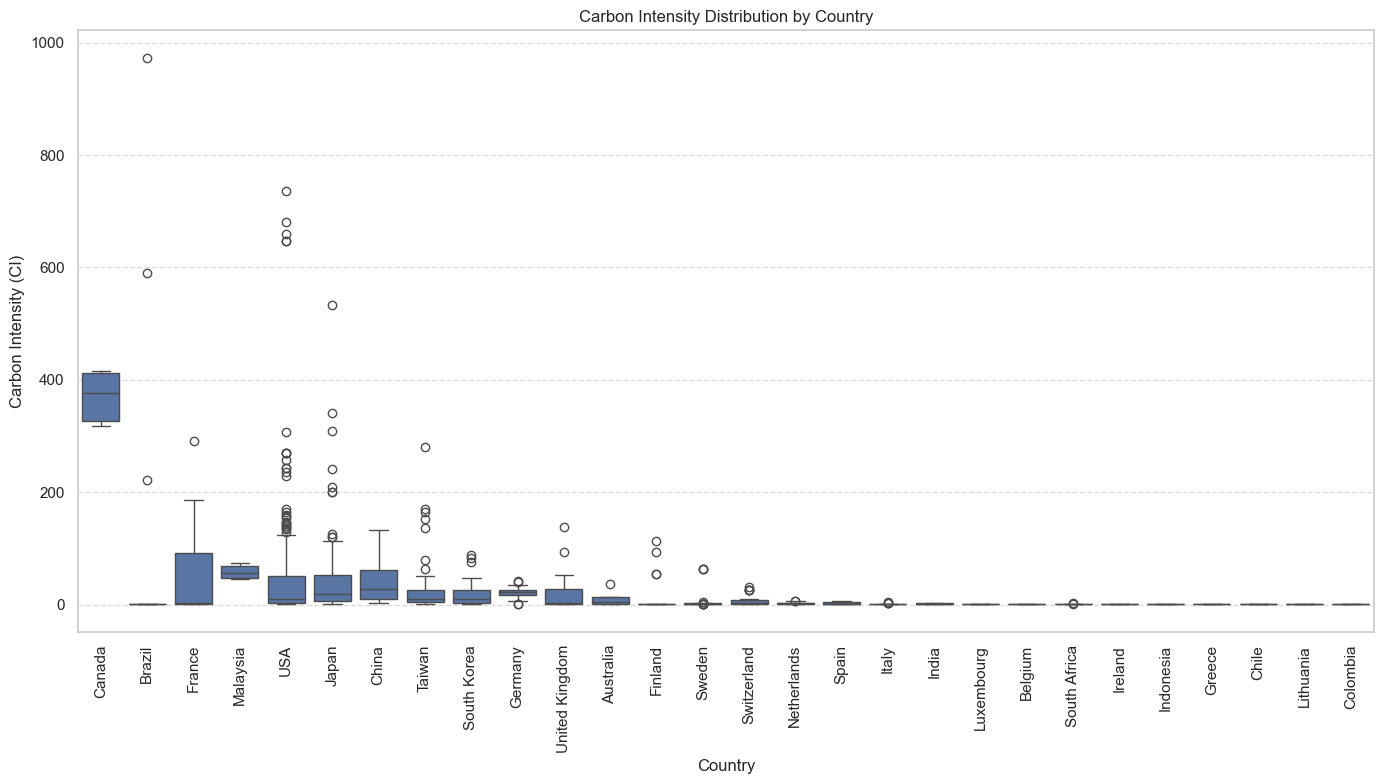

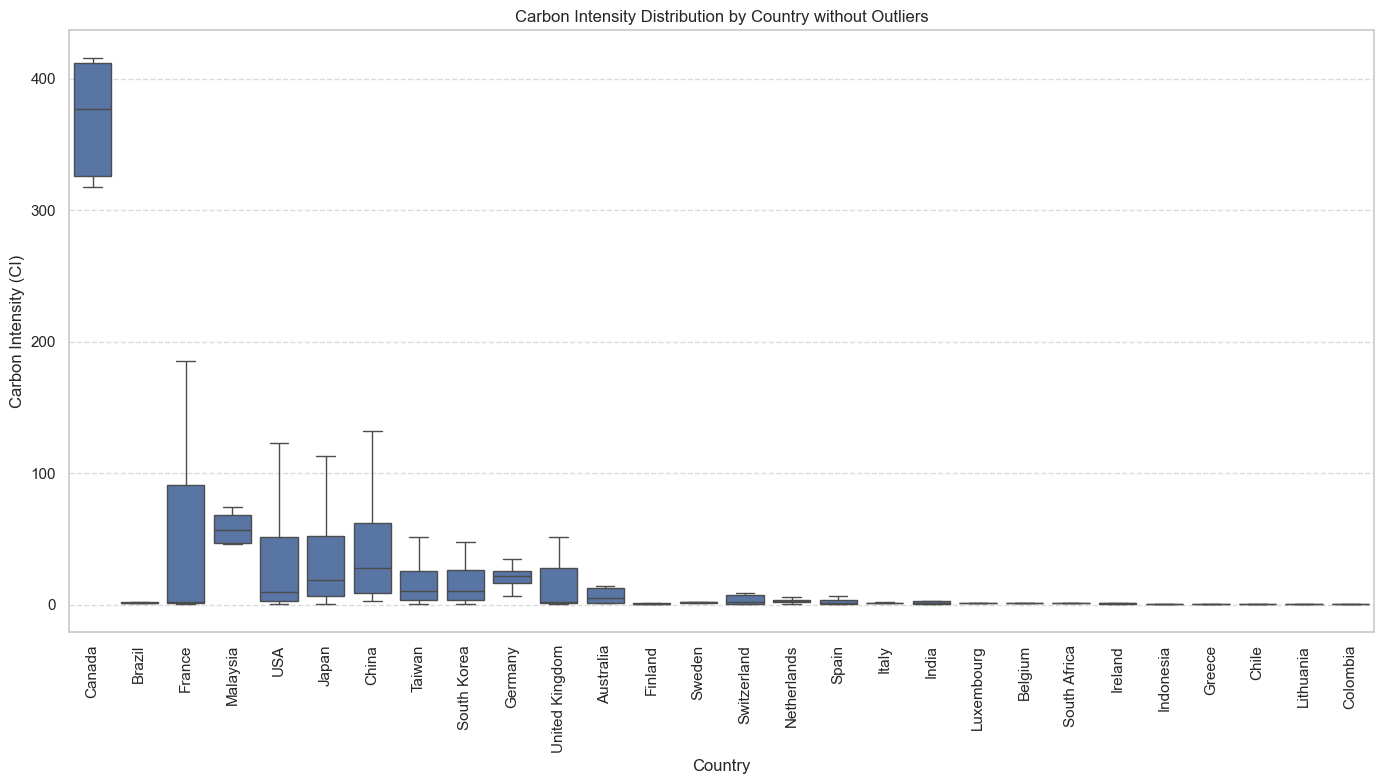

In [65]:
# Boxplot with outliers
sns.set(style = "whitegrid")
plt.figure(figsize = (14, 8))
sns.boxplot(x = 'Country (where company is incorporated)', y = '*Carbon intensity', data = df, order = sorted_countries)
plt.xticks(rotation = 90)
plt.title('Carbon Intensity Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Carbon Intensity (CI)')
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.tight_layout()
plt.show()

# Boxplot without outliers
sns.set(style = "whitegrid")
plt.figure(figsize = (14, 8))
sns.boxplot(x = 'Country (where company is incorporated)', y = '*Carbon intensity', data = df, order = sorted_countries, showfliers = False)
plt.xticks(rotation = 90)
plt.title('Carbon Intensity Distribution by Country without Outliers')
plt.xlabel('Country')
plt.ylabel('Carbon Intensity (CI)')
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.tight_layout()
plt.show()

In [66]:
# variance, mean, ... seems to vary a lot. But what about the sample size of each country?

#### Quantity of data points varies!

/var/folders/zr/t8gn_6f568qdn8pqp92n34kh0000gn/T/ipykernel_2275/3022015549.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Country (where company is incorporated)', y = 'Count', data = ci_listings_country, palette = 'viridis', order = sorted_countries)


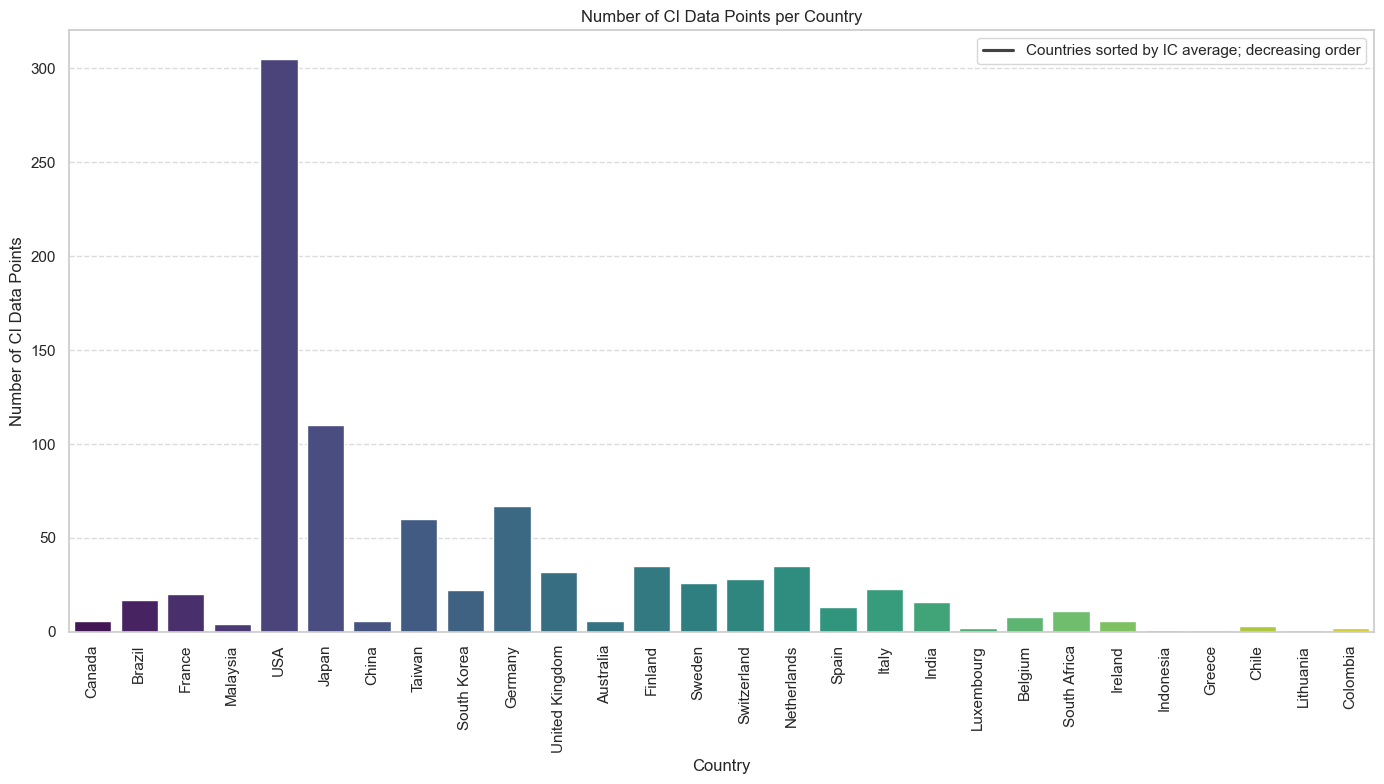

In [67]:
# Number of CI data points per Country
ci_listings_country = df.groupby('Country (where company is incorporated)').size().reset_index(name = 'Count')
ci_listings_country.sort_values(by = 'Count', inplace = True)

# Set the plot size
plt.figure(figsize = (14, 8))
sns.set(style = "whitegrid")

# Create a bar plot
sns.barplot(x = 'Country (where company is incorporated)', y = 'Count', data = ci_listings_country, palette = 'viridis', order = sorted_countries)
plt.xticks(rotation = 90)
plt.title('Number of CI Data Points per Country')
plt.xlabel('Country')
plt.ylabel('Number of CI Data Points')
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.legend(['Countries sorted by IC average; decreasing order'])
plt.tight_layout()
plt.show()

In [68]:
# We can see a huge variety in datapoints for the countrys

### Grouping Countries into Regions

In [69]:
# Reasons for grouping into regions:
# 1. The dataset includes countries with highly uneven sample sizes, ranging from over 300 data points to as few as 20. (see barplot "Number of CI Data Points per Country" above). Analyzing countries with very small sample sizes individually may lead to unreliable or biased results
# 2. By grouping countries into geographical regions, we can get an overall view of carbon intensity patterns without being distracted by noise from small-sample countries. This provides a clearer picture of trends and outliers at a macro level.
# 3. Many sustainability initiatives, trade agreements, and policy frameworks (e.g., the European Green Deal, ASEAN sustainability initiatives) are structured around regions rather than individual countries (see Green Deal at: https://commission.europa.eu/strategy-and-policy/priorities-2019-2024/european-green-deal_en , accessed on 16.11.2024)
# 4. By grouping countries, outliers are averaged out, providing a more stable representation of CI within regions and reducing the influence of anomalies.
# 5. Overall, clients like Global Trade Alliance are interested in actionable policies rather than micro level distinctions. Macro level trends are therefore more intersting

# Potential negative consequences to consider:
# 1. Overshadowing Unique Country Characteristics
# 2. Artificial Grouping: Geographical regions are often defined by proximity, but they do not always align with economic, cultural, or industrial characteristics

In [70]:
# Categorizing countries into regions
def categorize_region(country):
    if country in ['USA', 'Canada']:
        return 'North America'
    elif country in ['Brazil', 'Chile', 'Colombia']:
        return 'Latin America'
    elif country in ['Belgium', 'Finland', 'France', 'Germany', 'Greece', 'Ireland', 
                     'Italy', 'Lithuania', 'Luxembourg', 'Netherlands', 'Spain', 
                     'Sweden', 'Switzerland', 'United Kingdom']:
        return 'Europe'
    elif country in ['China', 'Japan', 'South Korea', 'Taiwan']:
        return 'East Asia'
    elif country in ['India', 'Indonesia', 'Malaysia']:
        return 'Southeast Asia'
    else:
        return 'Other'

ci_listings_country['Region'] = ci_listings_country['Country (where company is incorporated)'].apply(categorize_region)

# Merging to original dataframe
df = df.merge(ci_listings_country[['Country (where company is incorporated)', 'Region']], 
              on = 'Country (where company is incorporated)', how = 'left')

#print(ci_listings_country)

           Region  Count  *Carbon intensity
0           Other     17           4.421765
1  Southeast Asia     21          12.331905
2   Latin America     22          82.125455
3       East Asia    198          37.554646
4          Europe    297          13.851987
5   North America    311          51.357910


/var/folders/zr/t8gn_6f568qdn8pqp92n34kh0000gn/T/ipykernel_2275/2167182593.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Region', y = 'Count', data = ci_listings_region, palette = 'viridis')


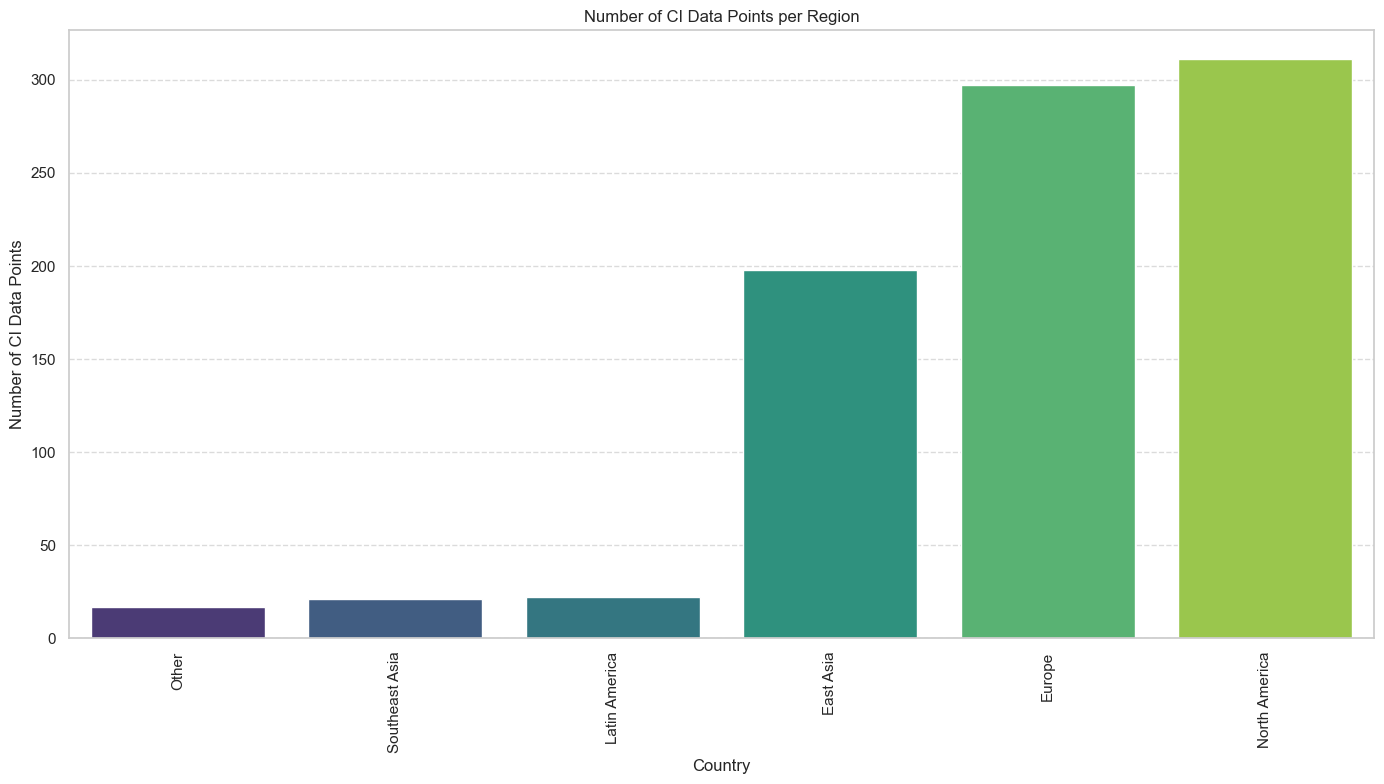

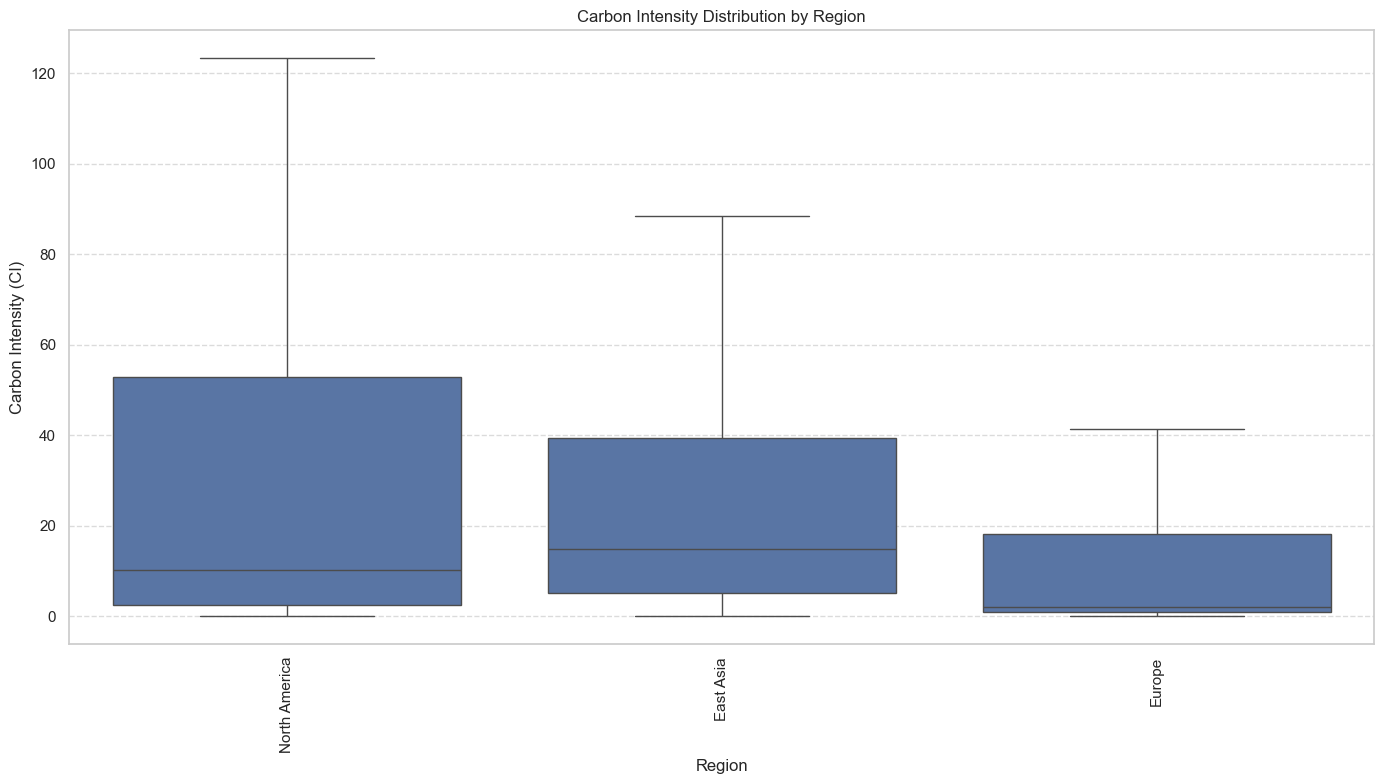

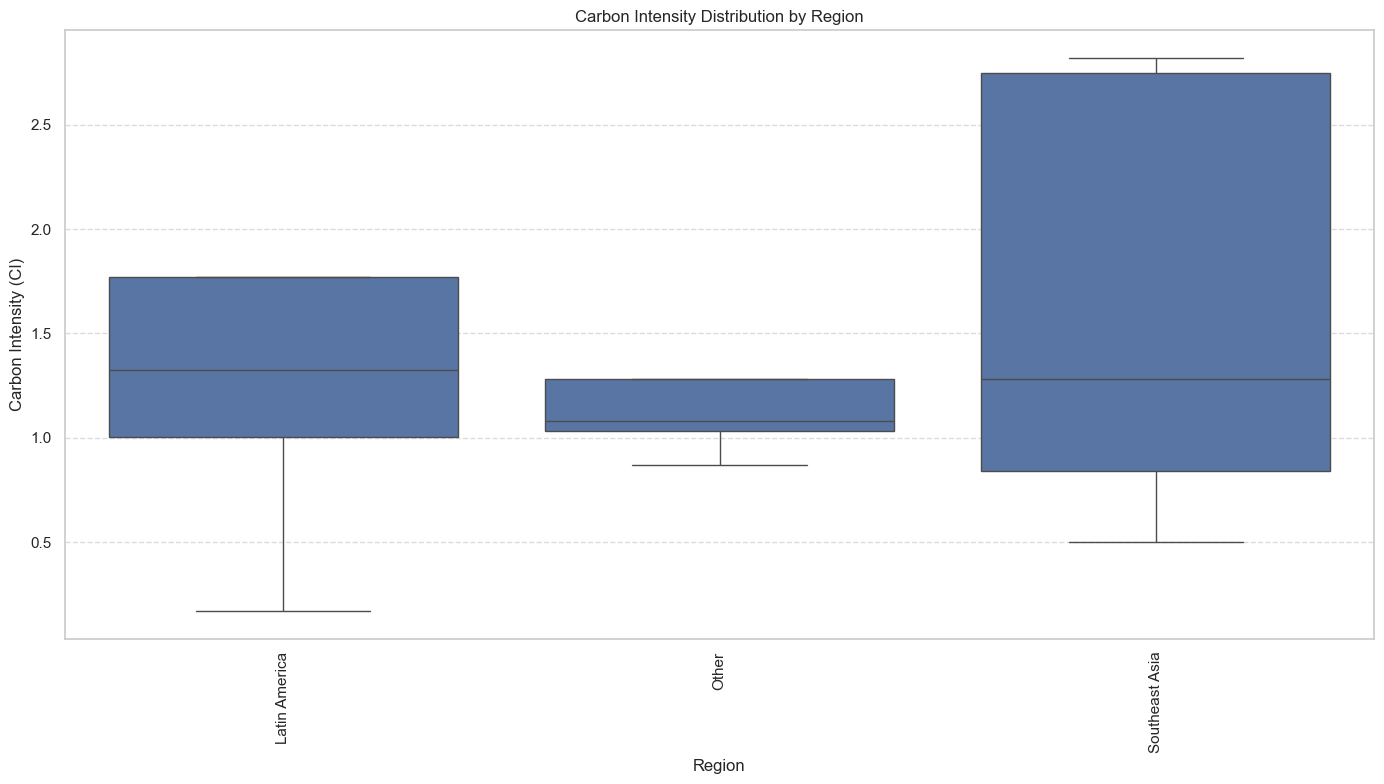

In [71]:
# Calculating region count
ci_listings_region = df.groupby('Region').size().reset_index(name = 'Count')
ci_listings_region.sort_values(by = 'Count', inplace = True)

# Average carbon intesity for each region
ci_avg_region = df.groupby('Region')['*Carbon intensity'].mean()
ci_avg_region = ci_avg_region.sort_values(ascending = False).reset_index()

#merg region count and avg. CI
merged_region_data = ci_listings_region.merge(ci_avg_region, on='Region')
merged_region_data = ci_listings_region.merge(ci_avg_region, on = 'Region')

print(merged_region_data)

# Barplot
plt.figure(figsize = (14, 8))
sns.set(style = "whitegrid")
sns.barplot(x = 'Region', y = 'Count', data = ci_listings_region, palette = 'viridis')
plt.xticks(rotation = 90)
plt.title('Number of CI Data Points per Region')
plt.xlabel('Country')
plt.ylabel('Number of CI Data Points')
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.tight_layout()
plt.show()

# Splitting in two groups:
region_high_count = ['North America', 'Europe', 'East Asia']
region_low_count = ['Latin America', 'Southeast Asia', 'Other']

# Boxplot for high count regions
plt.figure(figsize = (14, 8))
sns.boxplot(x = 'Region', y = '*Carbon intensity', data = df[df['Region'].isin(region_high_count)], showfliers = False) 
plt.xticks(rotation = 90)
plt.title('Carbon Intensity Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Carbon Intensity (CI)')
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.tight_layout()
plt.show()
# excluding outliers is essential

# Boxplot for low count regions
plt.figure(figsize = (14, 8))
sns.boxplot(x = 'Region', y = '*Carbon intensity', data = df[df['Region'].isin(region_low_count)], showfliers = False)
plt.xticks(rotation = 90)
plt.title('Carbon Intensity Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Carbon Intensity (CI)')
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.tight_layout()
plt.show()
# excluding outliers is essential

In [72]:
print(df['Region'].unique())

['North America' 'East Asia' 'Europe' 'Latin America' 'Other'
 'Southeast Asia']


In [73]:
region_list = ['North America', 'East Asia', 'Europe', 'Latin America', 'Other', 'Southeast Asia']

#### Hisogram

##### before transforming

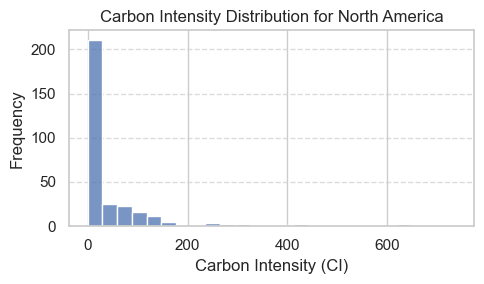

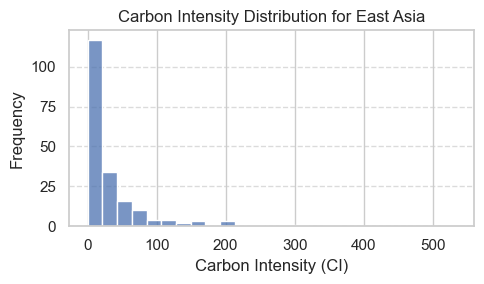

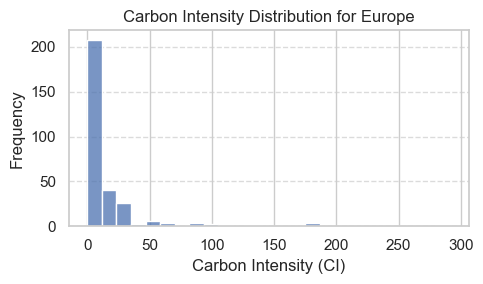

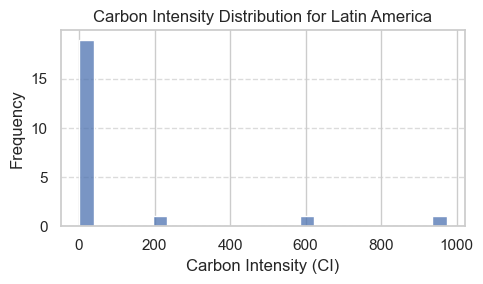

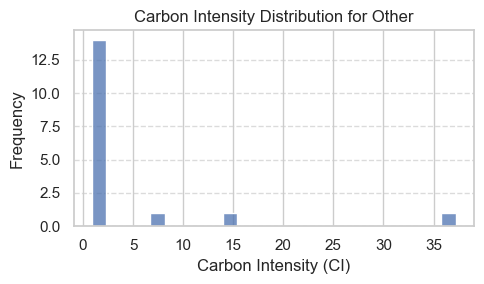

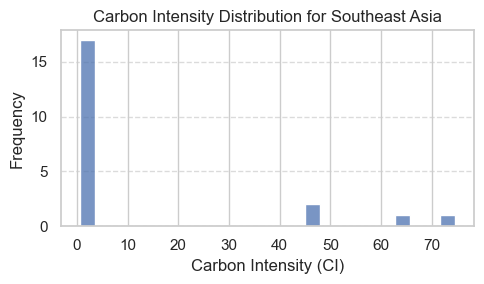

In [74]:
# Loop through each region and create a histogram
for region in region_list:
    plt.figure(figsize = (5, 3))
    sns.histplot(data = df[df['Region'] == region], 
                 x = '*Carbon intensity', 
                 bins = 25, 
                 kde = False)
    plt.title(f'Carbon Intensity Distribution for {region}')
    plt.xlabel('Carbon Intensity (CI)')
    plt.ylabel('Frequency')
    plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
    plt.tight_layout()
    plt.show()

##### log transform to check for normality

In [75]:
df['log_CI'] = np.log(df['*Carbon intensity'] + 1) # to avoid log(0)

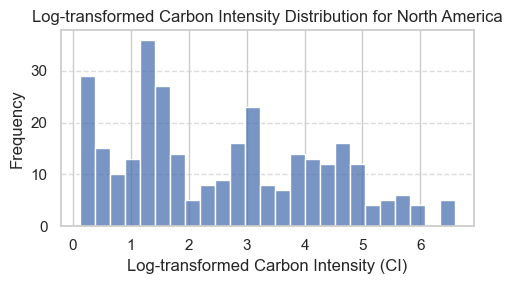

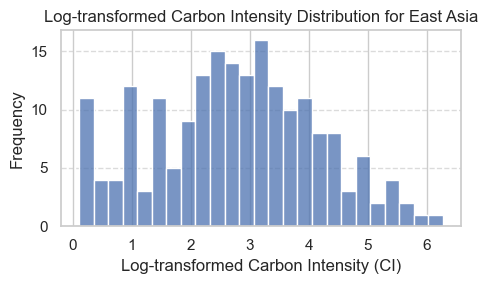

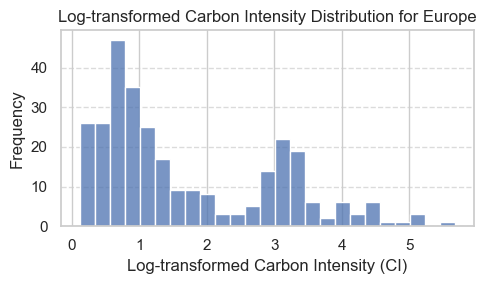

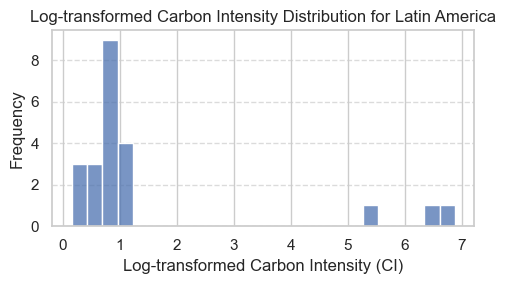

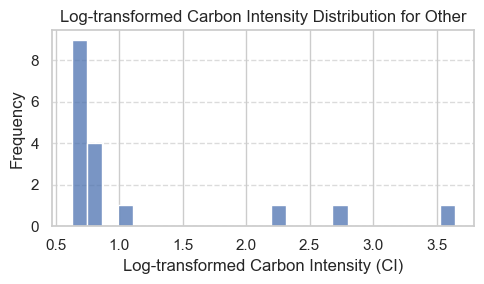

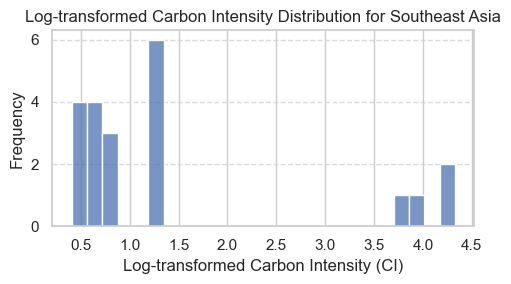

In [76]:
# Loop through each region and create a histogram
for region in region_list:
    plt.figure(figsize = (5, 3))
    sns.histplot(data = df[df['Region'] == region], 
                 x = 'log_CI', 
                 bins = 25, 
                 kde = False)
    plt.title(f'Log-transformed Carbon Intensity Distribution for {region}')
    plt.xlabel('Log-transformed Carbon Intensity (CI)')
    plt.ylabel('Frequency')
    plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
    plt.tight_layout()
    plt.show()

##### statistical Check for normality

In [77]:
# Histograms already suggested a non-normal distribution

In [78]:
# Check for nomality with Shapiro-Wilk Test
for region in df['Region'].unique():
    region_data = df[df['Region'] == region]['log_CI']
    stat, p_value = stats.shapiro(region_data)
    print(f"Region: {region}, p-value: {p_value:.4f} {'(Not Normal)' if p_value < 0.05 else '(Normal)'}")

Region: North America, p-value: 0.0000 (Not Normal)
Region: East Asia, p-value: 0.0724 (Normal)
Region: Europe, p-value: 0.0000 (Not Normal)
Region: Latin America, p-value: 0.0000 (Not Normal)
Region: Other, p-value: 0.0000 (Not Normal)
Region: Southeast Asia, p-value: 0.0000 (Not Normal)


#### Kruskal Wallis as non-parametric test

In [79]:
# Assumptions:
# 1. Data are assumed to be non-Normal or take a skewed distribution. One-way ANOVA should be used when data follow a Normal distribution.
# 2. The variable of interest should have two or more independent groups. The test is most commonly used in the analysis of three or more groups – for analyzing two groups the Mann-Whitney U test should be used instead.
# 3. The data are assumed to take a similar distribution across the groups.
# 4. The data should be randomly selected independent samples, in that the groups should have no relationship to each other.
# 5. Each group sample should have at least 5 observations for a sufficient sample size.

In [80]:
# Perform test by grouped regions to satisfy # 3.
region_high_data = [df[df['Region'] == region]['log_CI'] for region in region_high_count]
region_low_data = [df[df['Region'] == region]['log_CI'] for region in region_low_count]

# Test on high count regions
kruskal_stat_high, kruskal_p_value_high = stats.kruskal(*region_high_data)
print(f"High Count Regions - Kruskal-Wallis Test p-value: {kruskal_p_value_high:.4f}")

# Test on low count regions
kruskal_stat_low, kruskal_p_value_low = stats.kruskal(*region_low_data)
print(f"Low Count Regions - Kruskal-Wallis Test p-value: {kruskal_p_value_low:.4f}")


High Count Regions - Kruskal-Wallis Test p-value: 0.0000
Low Count Regions - Kruskal-Wallis Test p-value: 0.8202


In [81]:
# A significant difference is found between North America, East Asia and Europe

In [82]:
# Post hoc test:
df_high_count_region = df[df['Region'].isin(region_high_count)]
posthoc_high = posthoc_dunn(df_high_count_region, val_col = 'log_CI', group_col = 'Region', p_adjust = 'bonferroni')
print("Dunn's Post-hoc Test (High Count Regions):")
print(posthoc_high)

Dunn's Post-hoc Test (High Count Regions):
                  East Asia        Europe  North America
East Asia      1.000000e+00  5.982384e-15   2.372197e-01
Europe         5.982384e-15  1.000000e+00   7.004677e-12
North America  2.372197e-01  7.004677e-12   1.000000e+00


In [83]:
# no sig. difference between East Asia & North America
# sig. difference between Europe & East Asia
# sig. difference between Europe & North Americsa

In [84]:
# Pot. reasons: strickter enviromental regulations in Europe
# Pot. reasons: some (dirty) industries like [XXXX] are not located in Europe
# Pot. reasons: greener Energy mix

## for Policy Maker

### Initial Inspection

/var/folders/zr/t8gn_6f568qdn8pqp92n34kh0000gn/T/ipykernel_2275/3022015549.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Country (where company is incorporated)', y = 'Count', data = ci_listings_country, palette = 'viridis', order = sorted_countries)


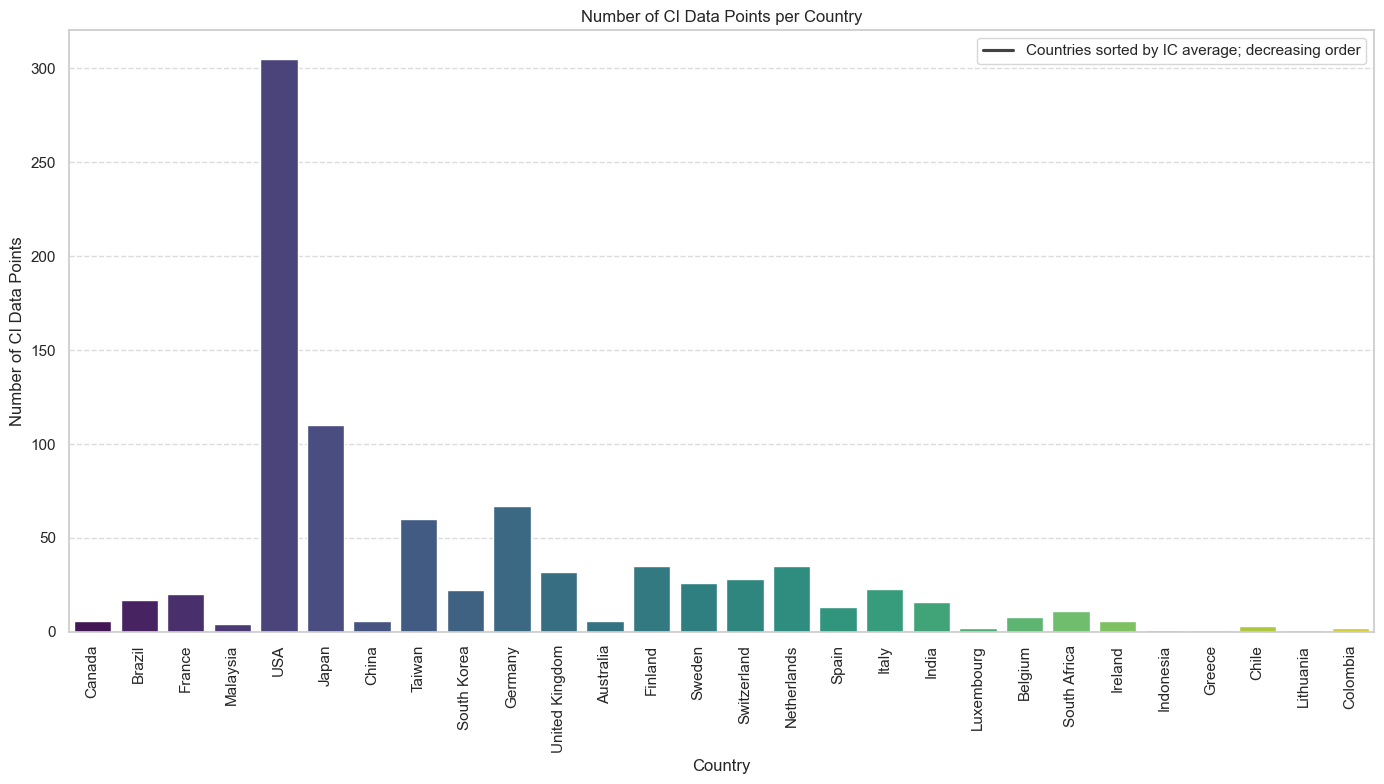

In [85]:
# Number of CI data points per Country
ci_listings_country = df.groupby('Country (where company is incorporated)').size().reset_index(name = 'Count')
ci_listings_country.sort_values(by = 'Count', inplace = True)

# Set the plot size
plt.figure(figsize = (14, 8))
sns.set(style = "whitegrid")

# Create a bar plot
sns.barplot(x = 'Country (where company is incorporated)', y = 'Count', data = ci_listings_country, palette = 'viridis', order = sorted_countries)
plt.xticks(rotation = 90)
plt.title('Number of CI Data Points per Country')
plt.xlabel('Country')
plt.ylabel('Number of CI Data Points')
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.legend(['Countries sorted by IC average; decreasing order'])
plt.tight_layout()
plt.show()

In [86]:
# - > the sample size differs significantly
# - > Grouping into regions for futher analysis

# Reasons for grouping into regions:
# 1. The dataset includes countries with highly uneven sample sizes, ranging from over 300 data points to as few as 20. (see barplot "Number of CI Data Points per Country" above). Analyzing countries with very small sample sizes individually may lead to unreliable or biased results
# 2. By grouping countries into geographical regions, we can get an overall view of carbon intensity patterns without being distracted by noise from small-sample countries. This provides a clearer picture of trends and outliers at a macro level.
# 3. Many sustainability initiatives, trade agreements, and policy frameworks (e.g., the European Green Deal, ASEAN sustainability initiatives) are structured around regions rather than individual countries (see Green Deal at: https://commission.europa.eu/strategy-and-policy/priorities-2019-2024/european-green-deal_en , accessed on 16.11.2024)
# 4. By grouping countries, outliers are averaged out, providing a more stable representation of CI within regions and reducing the influence of anomalies.
# 5. Overall, clients like Global Trade Alliance are interested in actionable policies rather than micro level distinctions. Macro level trends are therefore more intersting.

# Potential negative consequences to consider:
# 1. Overshadowing Unique Country Characteristics.
# 2. Artificial Grouping: Geographical regions are often defined by proximity, but they do not always align with economic, cultural, or industrial characteristics.

### Regions in detail: Sample Size & Carbon Intencity 

           Region  Count  *Carbon intensity
0           Other     17           4.421765
1  Southeast Asia     21          12.331905
2   Latin America     22          82.125455
3       East Asia    198          37.554646
4          Europe    297          13.851987
5   North America    311          51.357910


/var/folders/zr/t8gn_6f568qdn8pqp92n34kh0000gn/T/ipykernel_2275/2078134649.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Region', y = 'Count', data = ci_listings_region, palette = 'viridis')


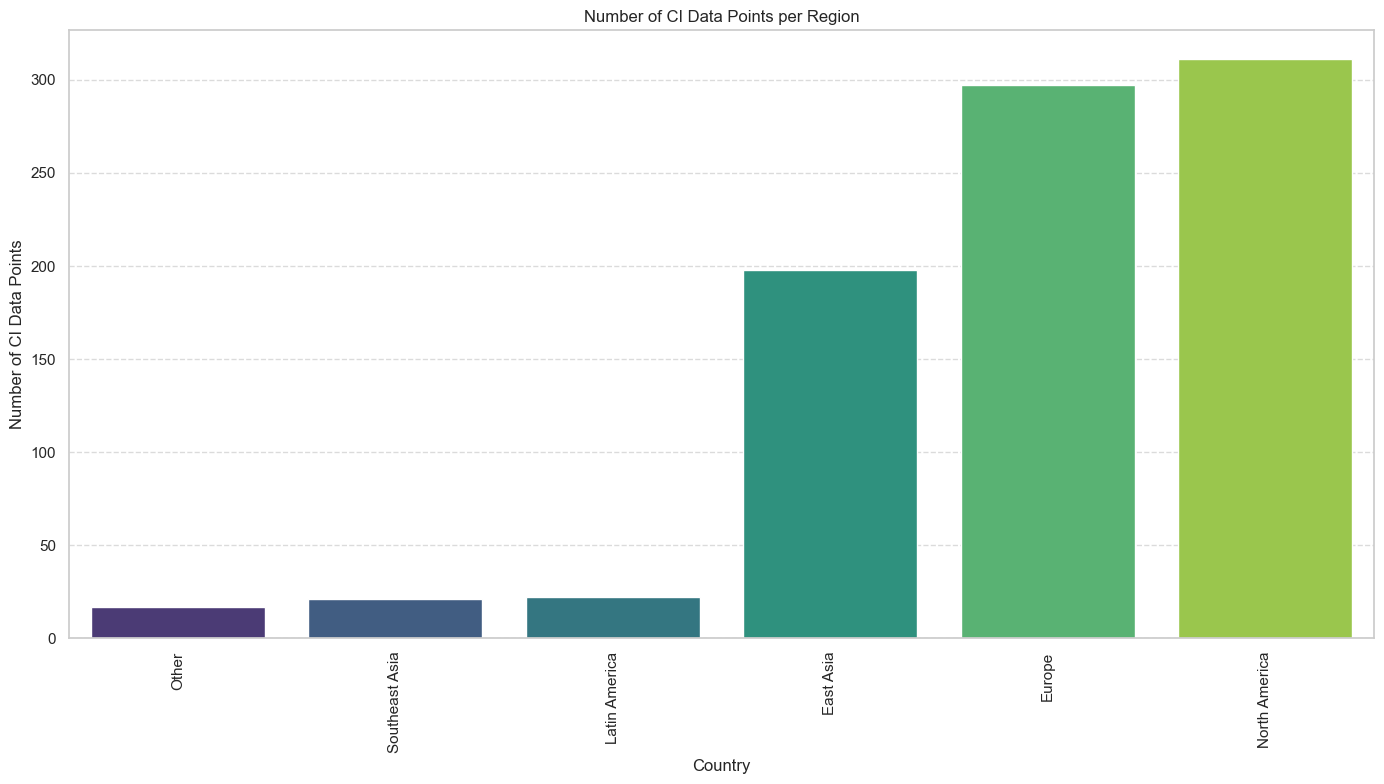

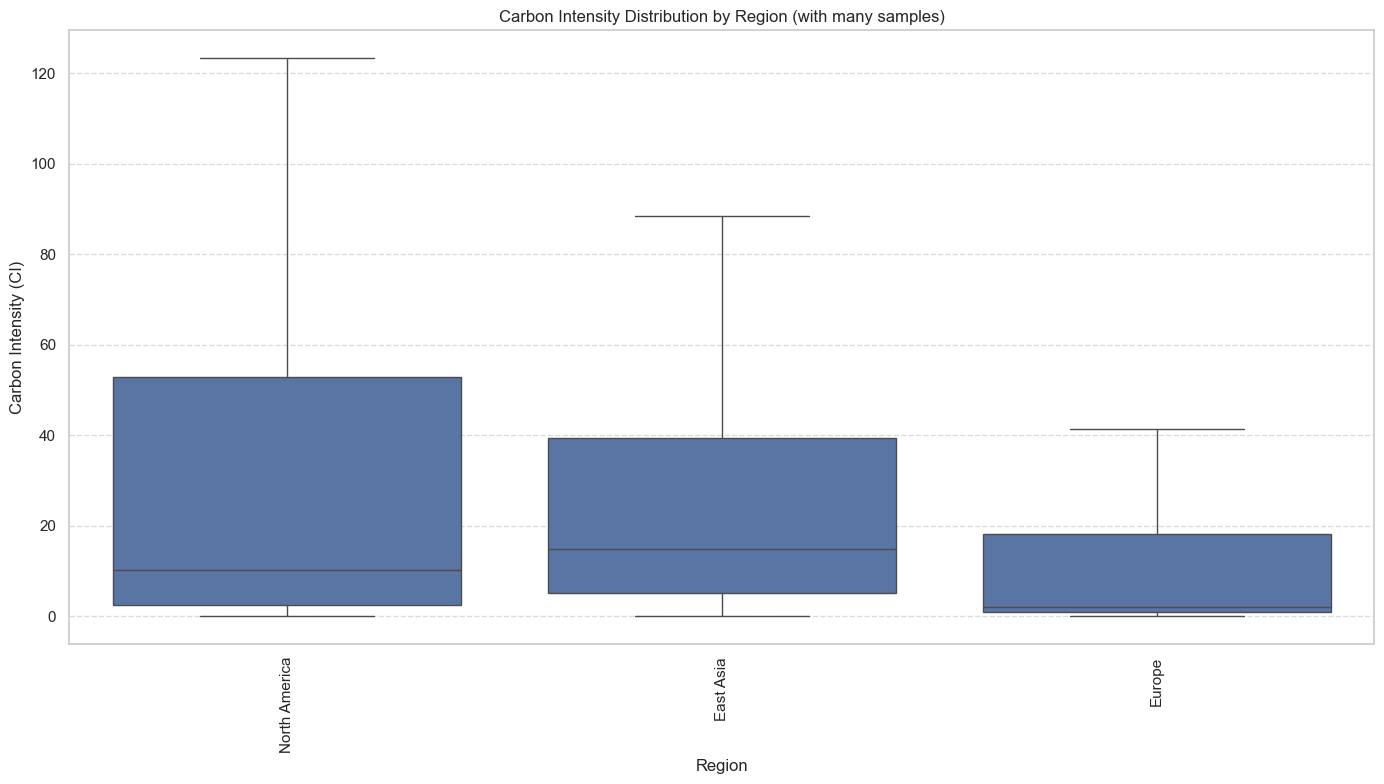

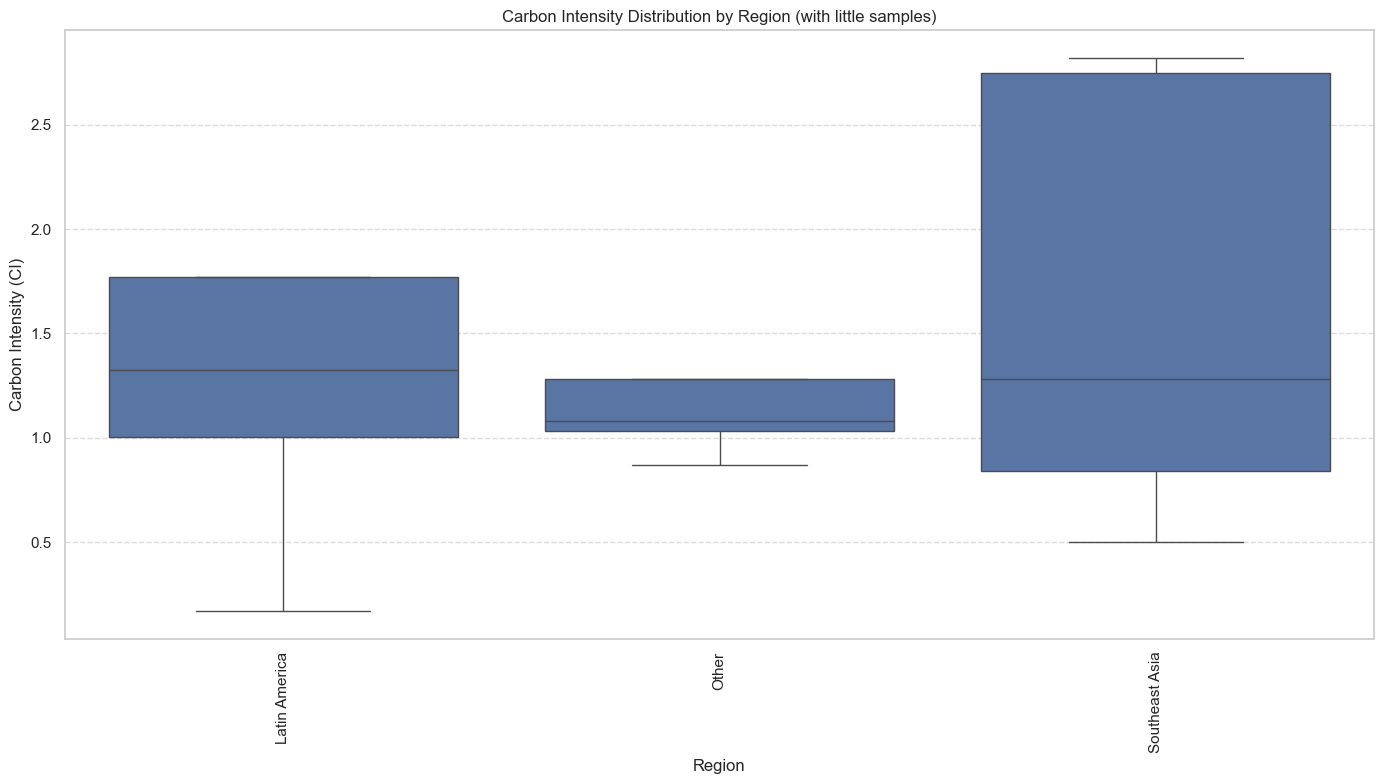

In [87]:
# Calculating region count
ci_listings_region = df.groupby('Region').size().reset_index(name = 'Count')
ci_listings_region.sort_values(by = 'Count', inplace = True)

# Average carbon intesity for each region
ci_avg_region = df.groupby('Region')['*Carbon intensity'].mean()
ci_avg_region = ci_avg_region.sort_values(ascending = False).reset_index()

#merg region count and avg. CI
merged_region_data = ci_listings_region.merge(ci_avg_region, on='Region')
merged_region_data = ci_listings_region.merge(ci_avg_region, on = 'Region')

print(merged_region_data)

# Barplot
plt.figure(figsize = (14, 8))
sns.set(style = "whitegrid")
sns.barplot(x = 'Region', y = 'Count', data = ci_listings_region, palette = 'viridis')
plt.xticks(rotation = 90)
plt.title('Number of CI Data Points per Region')
plt.xlabel('Country')
plt.ylabel('Number of CI Data Points')
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.tight_layout()
plt.show()

# Splitting in two groups:
region_high_count = ['North America', 'Europe', 'East Asia']
region_low_count = ['Latin America', 'Southeast Asia', 'Other']

# Boxplot for high count regions
plt.figure(figsize = (14, 8))
sns.boxplot(x = 'Region', y = '*Carbon intensity', data = df[df['Region'].isin(region_high_count)], showfliers = False) 
plt.xticks(rotation = 90)
plt.title('Carbon Intensity Distribution by Region (with many samples)')
plt.xlabel('Region')
plt.ylabel('Carbon Intensity (CI)')
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.tight_layout()
plt.show()
# excluding outliers is essential

# Boxplot for low count regions
plt.figure(figsize = (14, 8))
sns.boxplot(x = 'Region', y = '*Carbon intensity', data = df[df['Region'].isin(region_low_count)], showfliers = False)
plt.xticks(rotation = 90)
plt.title('Carbon Intensity Distribution by Region (with little samples)')
plt.xlabel('Region')
plt.ylabel('Carbon Intensity (CI)')
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.tight_layout()
plt.show()
# excluding outliers is essential

In [88]:
# Grouping in regions allows us to compare to, roughly same sized sub groups with each other

### Overall result

In [89]:
# Turns out that Europe differs significantly from both, North America and East Asia and is substentially lower that its western and eastern neighboring regions.